In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#  Cargamos el fichero a trabajar
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [3]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
# Variable magica para que todos los graficos queden alineados
%matplotlib inline

In [5]:
# Se puede usar para indicar donde guardar las imagenes
#savefig("path_donde_guardar_im.jpeg")

### Scatter Plot

<AxesSubplot:xlabel='Day Mins', ylabel='Day Charge'>

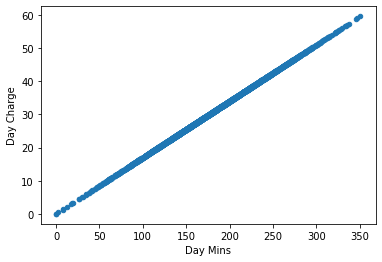

In [6]:
# Diagrama de dispersión que ve la relación entre 2 variables
# En este caso mientras mas carga mas son llamadas diarias
data.plot.scatter(x="Day Mins", y="Day Charge")

<AxesSubplot:xlabel='Night Mins', ylabel='Night Charge'>

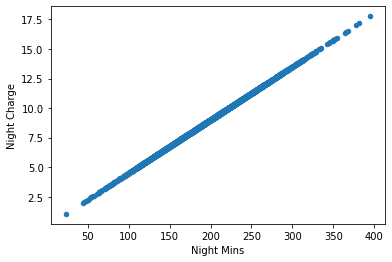

In [7]:
# Relación líneal que indica que mientras mas carga más 
# llamadas nocturnas
data.plot.scatter(x="Night Mins", y="Night Charge")

<AxesSubplot:xlabel='Night Calls', ylabel='Night Charge'>

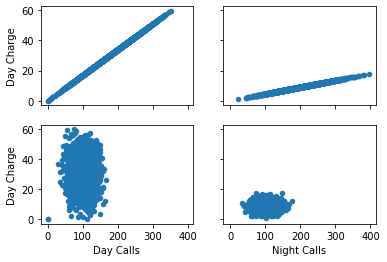

In [8]:
# Generamos un panel para representar multiples gráficos
# es necesario import matplotlib.pyplot as plt
# figure es para dibujar y axs son las ejes, en este caso
# una matriz 2x2 con eje x e y
figure, axs = plt.subplots(2,2, sharey=True, sharex=True)
# Dibujamos el primer gráfico en 0,0
data.plot.scatter(x="Day Mins", y="Day Charge", ax=axs[0][0])
data.plot.scatter(x="Night Mins", y="Night Charge", ax=axs[0][1])
data.plot.scatter(x="Day Calls", y="Day Charge", ax=axs[1][0])
data.plot.scatter(x="Night Calls", y="Night Charge", ax=axs[1][1])

### Historigramas de frecuencias

Text(0.5, 1.0, 'Historigrama del número de llamadas al día')

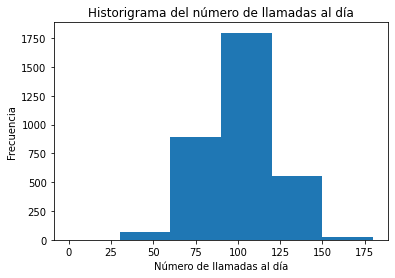

In [12]:
# Se necesita import matplotlib.pyplot as plt
# con hist(columna_a_graficar, bins=cantidad_divisiones)
# xlabel e ylabel son las etiquetas, title es el titulo
plt.hist(data["Day Calls"], bins=[0,30,60,90,120,150,180])
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Historigrama del número de llamadas al día")

Text(0.5, 1.0, 'Historigrama del número de llamadas al día')

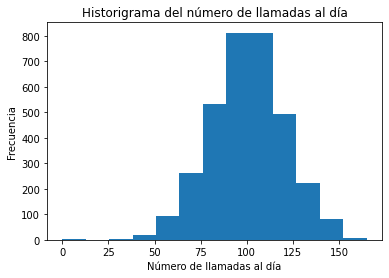

In [18]:
# Para calcular correctamente el bins se usa la regla de Sturges
# que dice bins = 1 + log2(M), donde M es el tamaño de la muestra
# se necesita import numpy as np

cantidadFilas = len(data.index)
stg = int(np.ceil(1+np.log2(cantidadFilas)))
plt.hist(data["Day Calls"], bins=stg)
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Historigrama del número de llamadas al día")

### Boxplot, diagrama de caja y bigotes

Text(0.5, 1.0, 'Boxplt de las llamadas diarias')

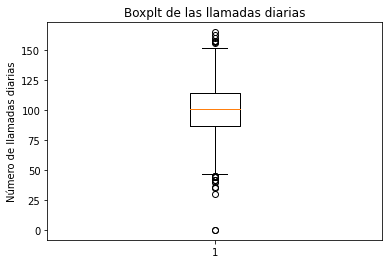

In [21]:
# Representa los 3 cuartiles , valores mínimos y máximo
plt.boxplot(data["Day Calls"])
plt.ylabel("Número de llamadas diarias")
plt.title("Boxplt de las llamadas diarias")
# La parte baja de la caja es el percentil 25 (25%), al medio es 
# el percentil 50 (50%) y la parte superior de la caja es el 
# percentil 75 (75%)
# Por debajo de la caja hay 1/4 de los datos.
# Por encima de la caja hay 25% de los datos.
# En la mitad sería la mediana.
# El valor modal es el que más aparece.


In [23]:
data["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64